In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-13-d986fa4f53a2>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(group_order))  # Get a color map


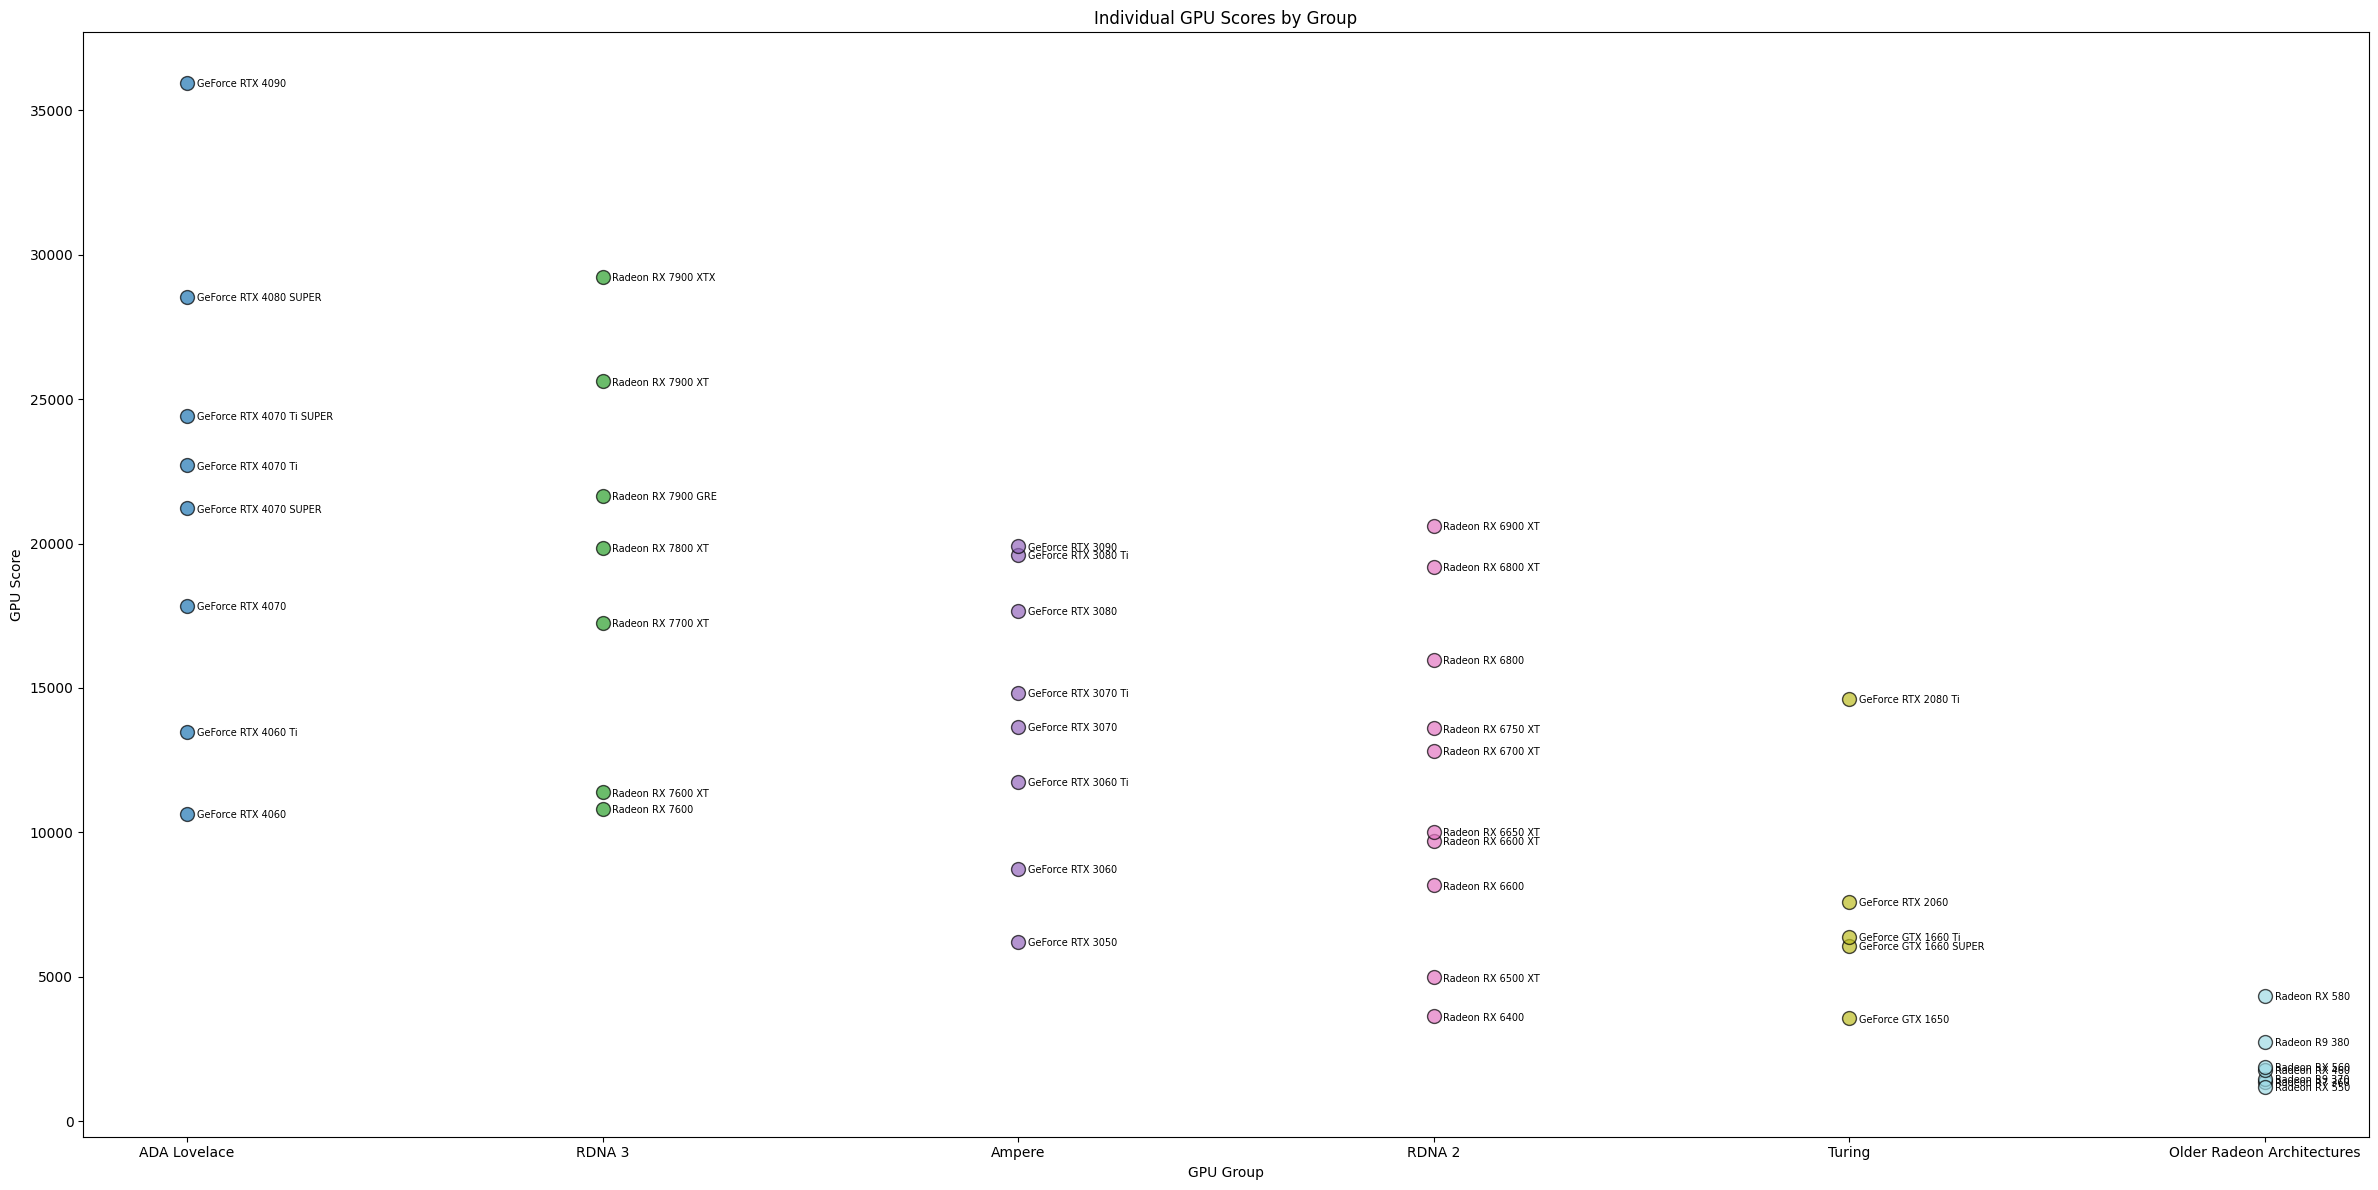

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file into DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/ECEN360/Final Project/gpu_metadata.csv')
df1.head(5)

# Manually define GPU groups
gpu_groups = {
    'ADA Lovelace': ['GeForce RTX 4060', 'GeForce RTX 4060 Ti',
                     'GeForce RTX 4070', 'GeForce RTX 4070 SUPER',
                     'GeForce RTX 4070 Ti', 'GeForce RTX 4070 Ti SUPER',
                     'GeForce RTX 4080 SUPER', 'GeForce RTX 4090'],

    'Ampere': ['GeForce RTX 3050', 'GeForce RTX 3060', 'GeForce RTX 3060 Ti',
               'GeForce RTX 3070', 'GeForce RTX 3070 Ti', 'GeForce RTX 3080',
               'GeForce RTX 3080 Ti', 'GeForce RTX 3090'],

    'Turing': ['GeForce RTX 2060','GeForce RTX 2080 Ti', 'GeForce GTX 1650',
               'GeForce GTX 1660 SUPER', 'GeForce GTX 1660 Ti'],

    'Pascal': ['GeForce RTX 1050', 'GeForce RTX 1050 Ti', 'GeForce GTX 1060'],

    'RDNA 3': ['Radeon RX 7900 XTX', 'Radeon RX 7900 XT', 'Radeon RX 7900 GRE',
               'Radeon RX 7800 XT', 'Radeon RX 7700 XT', 'Radeon RX 7600 XT',
               'Radeon RX 7600'],

    'RDNA 2': ['Radeon RX 6900 XT', 'Radeon RX 6800 XT', 'Radeon RX 6800',
               'Radeon RX 6750 XT', 'Radeon RX 6700 XT', 'Radeon RX 6650 XT',
               'Radeon RX 6600 XT', 'Radeon RX 6600', 'Radeon RX 6500 XT',
               'Radeon RX 6400'],

    'Older Radeon Architectures': ['Radeon RX 580', 'Radeon RX 560', 'Radeon RX 550',
                                   'Radeon RX 460', 'Radeon R9 380', 'Radeon R9 370',
                                   'Radeon R7 360']
}

# Create a new column 'group' based on the defined groups
def assign_group(name):
    for group, gpus in gpu_groups.items():
        if name in gpus:
            return group
    return 'Other'

# Define the function to plot individual GPU scores within groups
def plot_individual_gpu_scores(df):
    df['group'] = df['Name'].apply(assign_group)

    # Set the order for the groups
    group_order = ['ADA Lovelace', 'RDNA 3', 'Ampere', 'RDNA 2', 'Turing', 'Older Radeon Architectures']

    # Ensure the 'group' column has the correct categorical order
    df['group'] = pd.Categorical(df['group'], categories=group_order, ordered=True)

    # Create a figure
    plt.figure(figsize=(24, 12))

    # Create a scatter plot for each group
    colors = plt.cm.get_cmap('tab20', len(group_order))  # Get a color map

    for i, group in enumerate(group_order):
        group_data = df[df['group'] == group]

        # Scatter plot for each GPU within the group
        scatter = plt.scatter([group] * len(group_data), group_data['3DMARK'], label=group,
                              color=colors(i), s=100, edgecolors='black', alpha=0.7)  # Points for each GPU

        # Add annotations to each point
        for j, row in group_data.iterrows():
            plt.annotate(row['Name'],
                         (group, row['3DMARK']),
                         textcoords="offset points",
                         xytext=(7, -3),  # offset position for annotation
                         ha='left',
                         fontsize=7,
                         color='black')

    # Add labels and title
    plt.xlabel('GPU Group')
    plt.ylabel('GPU Score')
    plt.title('Individual GPU Scores by Group')

    # Set x-ticks to be the group names, in the correct order
    plt.xticks(range(len(group_order)), group_order)

    # Remove the legend
    plt.legend().set_visible(False)

    plt.tight_layout()
    #plt.show()


# Call the function to plot the graph
plot_individual_gpu_scores(df1)
plt.savefig('plot1.png', bbox_inches='tight')

In [ ]:
df1.head(5)

,Name,Wattage,VRAM,3DMARK,Release Date,group
0,GeForce GTX 1050,75W,2GB,1861,25-Oct-16,NaN
1,GeForce GTX 1050 Ti,75W,4GB,2356,25-Oct-16,NaN
2,GeForce GTX 1060,120W,6GB,4215,19-Jul-16,NaN
3,GeForce GTX 1650,75W,4GB,3552,23-Apr-19,Turing
4,GeForce GTX 1660 SUPER,125W,6GB,6078,29-Oct-19,Turing


<ipython-input-15-391984e03330>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


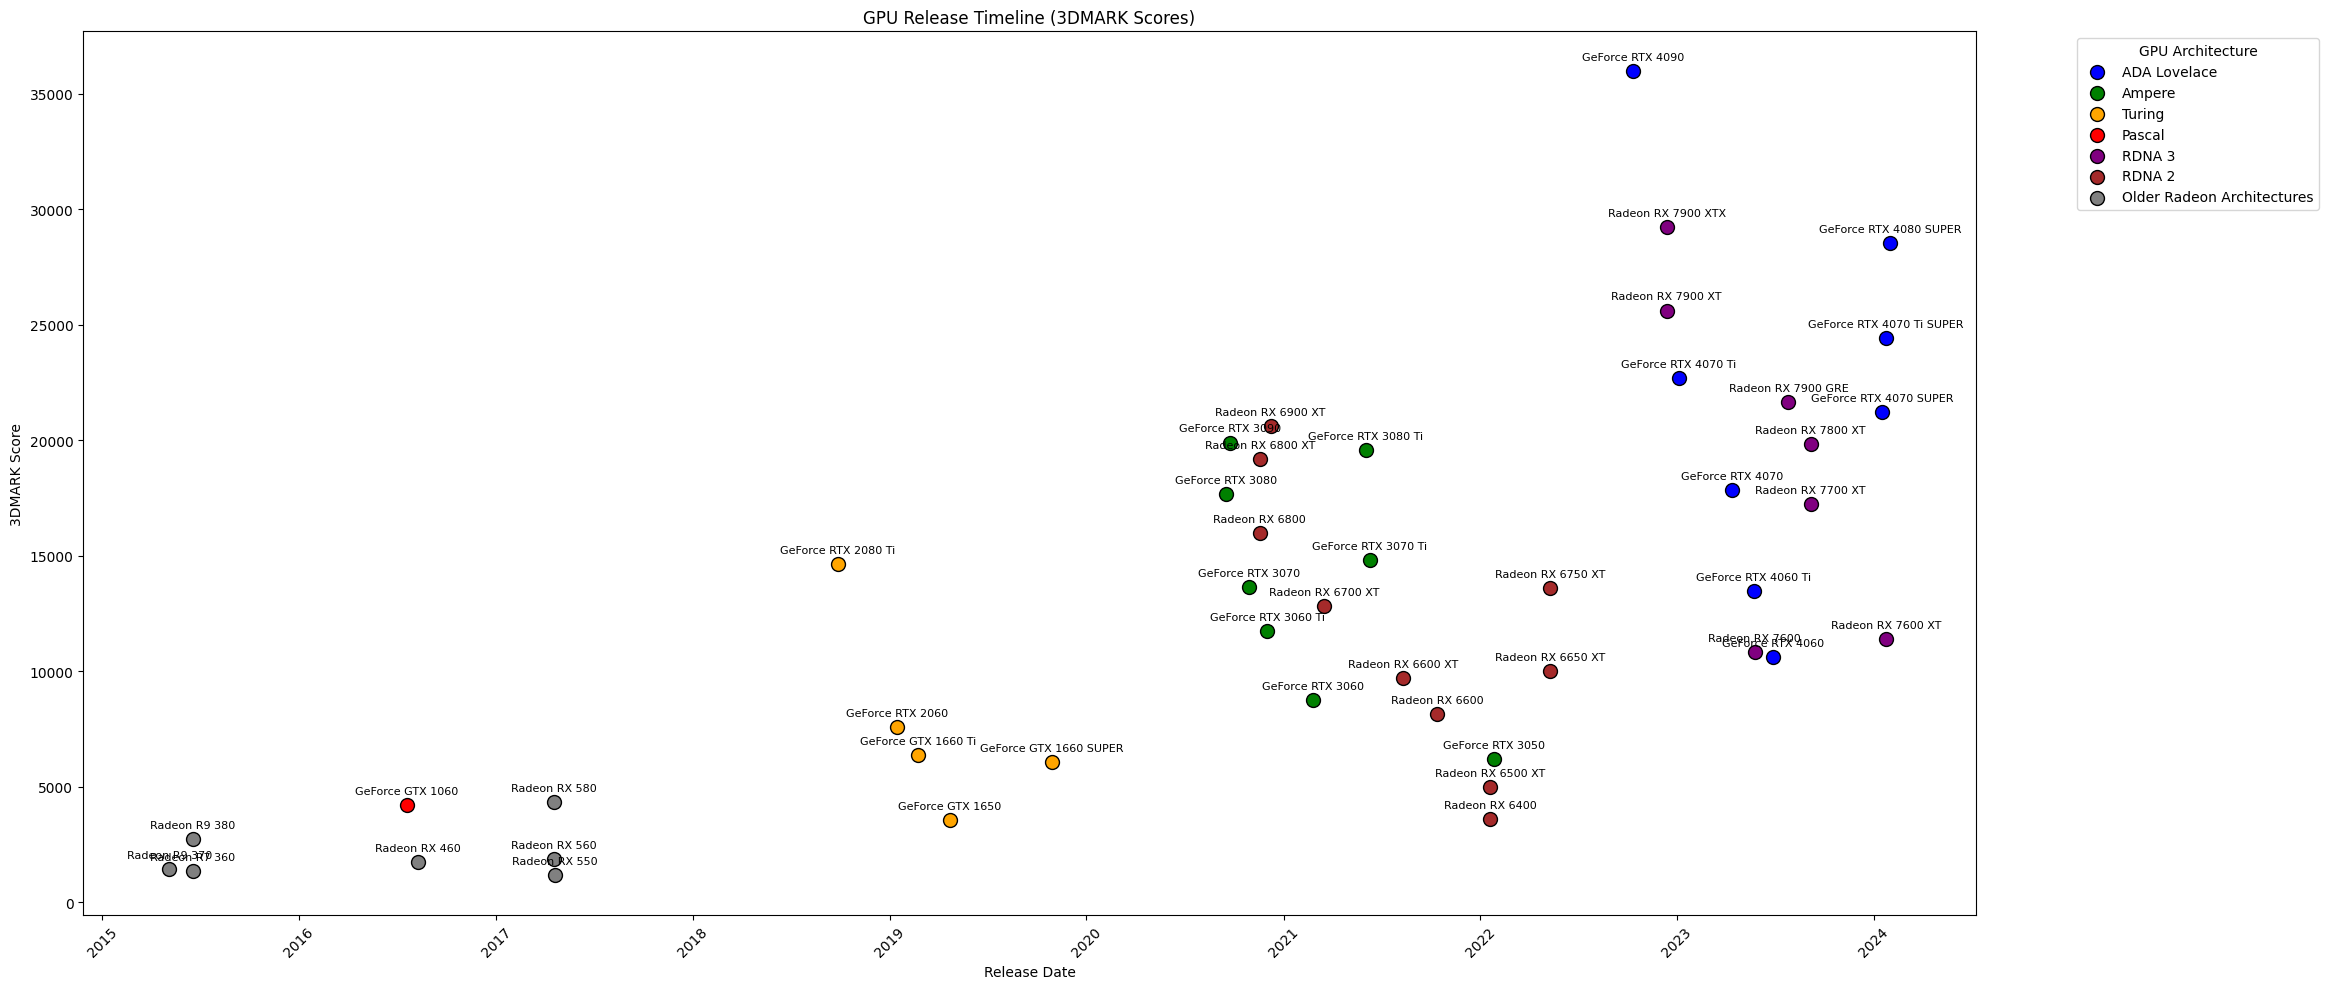

In [ ]:

# Function to plot GPU timeline with annotations
def plot_3DMARK_timeline(df):
    # Ensure 'Release Date' is in datetime format
    df['Release Date'] = pd.to_datetime(df['Release Date'])

    # Add a column for GPU architecture
    df['Architecture'] = df['Name'].apply(assign_group)

    # Plotting
    plt.figure(figsize=(20, 10))

    # Scatter plot: x-axis is 'Release Date', y-axis is '3DMARK', color by 'Architecture'
    colors = {'ADA Lovelace': 'blue', 'Ampere': 'green', 'Turing': 'orange', 'Pascal': 'red',
              'RDNA 3': 'purple', 'RDNA 2': 'brown', 'Older Radeon Architectures': 'gray'}

    for arch in gpu_groups:
        arch_df = df[df['Architecture'] == arch]
        scatter = plt.scatter(arch_df['Release Date'], arch_df['3DMARK'], label=arch,
                              color=colors.get(arch, 'black'), s=100, edgecolors='black')

        # Annotating each data point
        for i, row in arch_df.iterrows():
            plt.annotate(f"{row['Name']}",
                         (row['Release Date'], row['3DMARK']),
                         textcoords="offset points", xytext=(0, 8), ha='center', fontsize=8)

    # Formatting
    plt.xlabel('Release Date')
    plt.ylabel('3DMARK Score')
    plt.title('GPU Release Timeline (3DMARK Scores)')

    # Rotate the x-axis dates for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add legend
    plt.legend(title='GPU Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show plot
    #plt.show()

# Example usage:
plot_3DMARK_timeline(df1)
plt.savefig('plott.png', bbox_inches='tight')

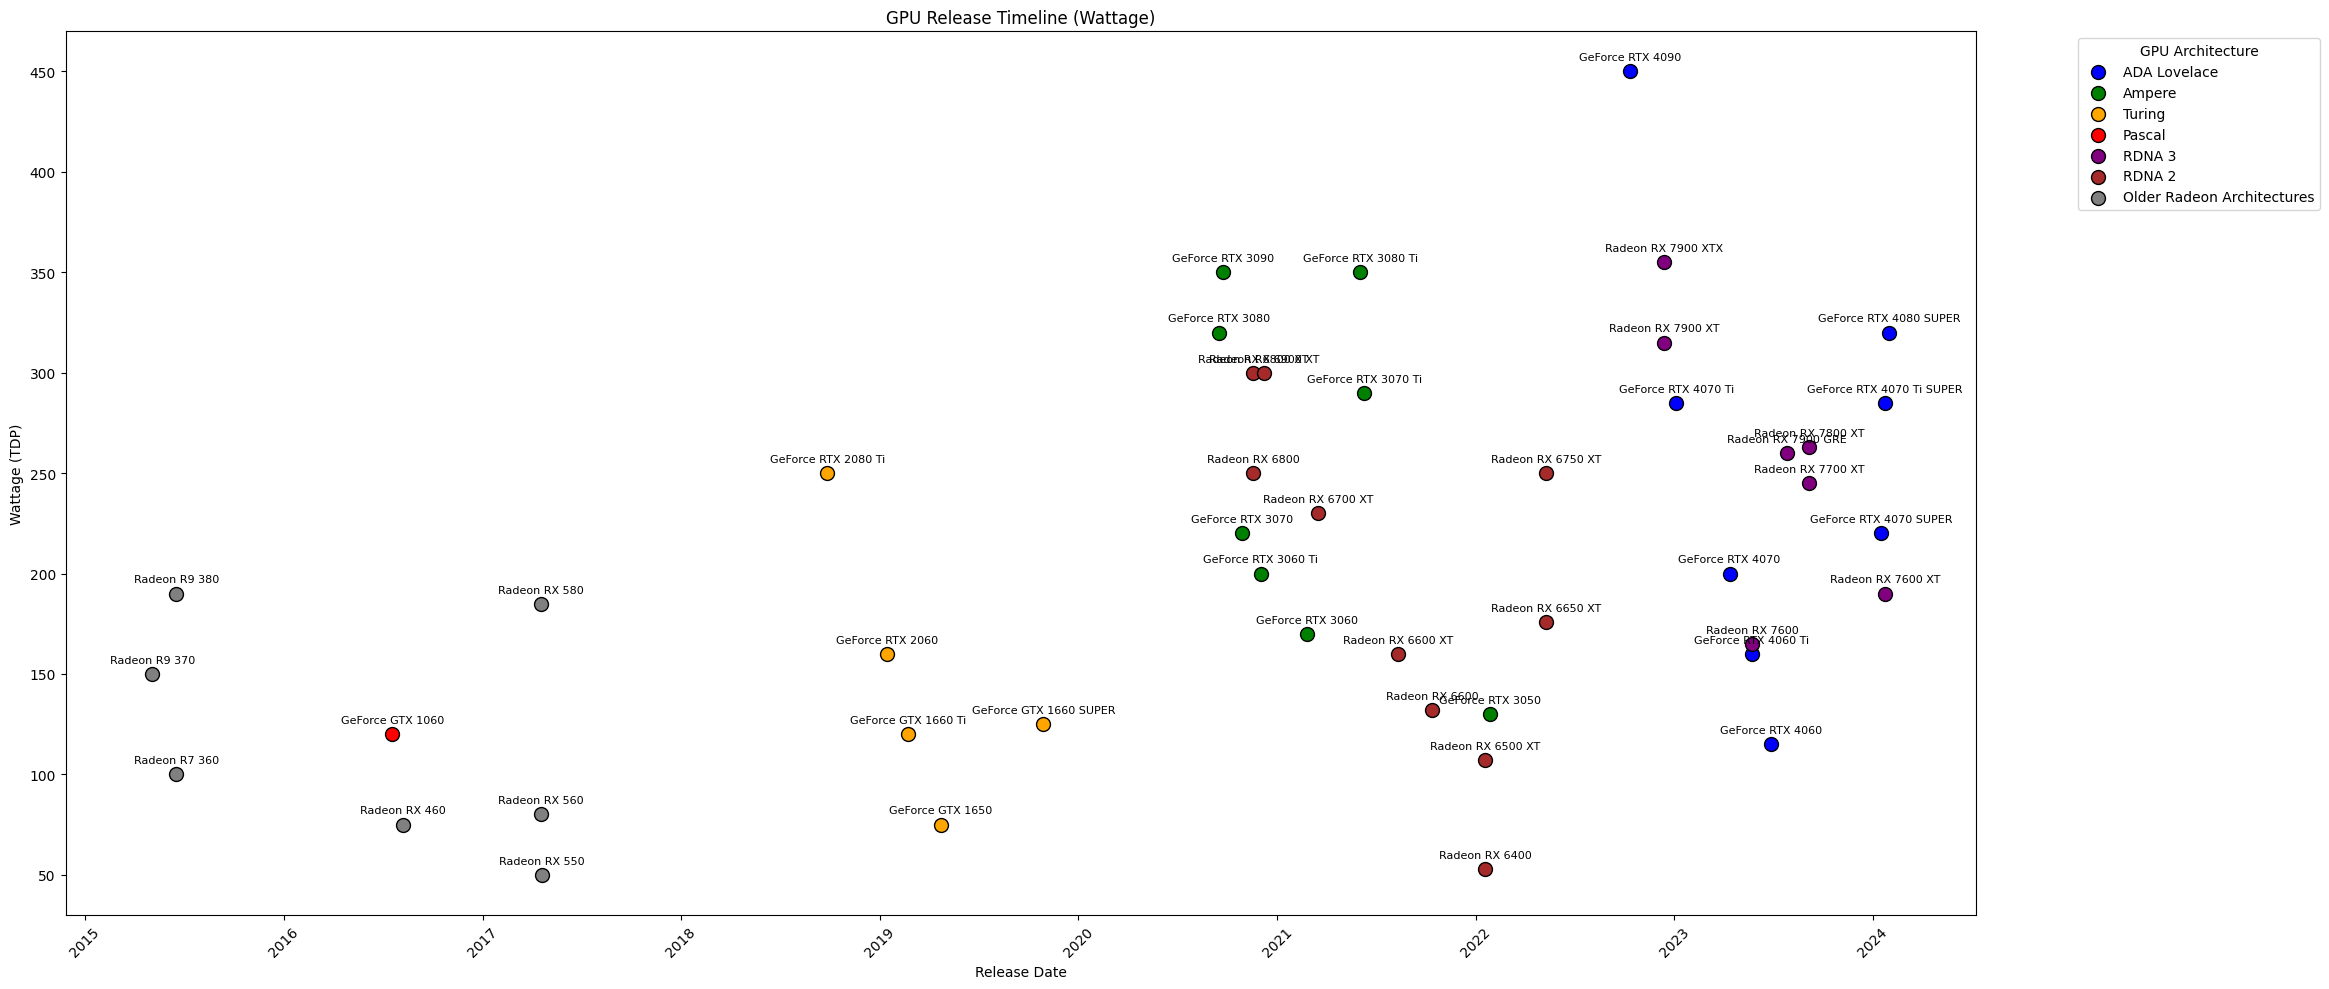

In [ ]:
# Function to plot GPU timeline with annotations
def plot_wattage_timeline(df):
    # Ensure 'Release Date' is in datetime format
    df['Release Date'] = pd.to_datetime(df['Release Date'])

    # Add a column for GPU architecture
    df['Architecture'] = df['Name'].apply(assign_group)

    df['Wattage'] = df['Wattage'].str.rstrip('W').astype(float)

    # Plotting
    plt.figure(figsize=(20, 10))

    # Scatter plot: x-axis is 'Release Date', y-axis is 'Wattage', color by 'Architecture'
    colors = {'ADA Lovelace': 'blue', 'Ampere': 'green', 'Turing': 'orange', 'Pascal': 'red',
              'RDNA 3': 'purple', 'RDNA 2': 'brown', 'Older Radeon Architectures': 'gray'}

    for arch in gpu_groups:
        arch_df = df[df['Architecture'] == arch]
        scatter = plt.scatter(arch_df['Release Date'], arch_df['Wattage'], label=arch,
                              color=colors.get(arch, 'black'), s=100, edgecolors='black')

        # Annotating each data point
        for i, row in arch_df.iterrows():
            plt.annotate(f"{row['Name']}",
                         (row['Release Date'], row['Wattage']),
                         textcoords="offset points", xytext=(0, 8), ha='center', fontsize=8)

    # Formatting
    plt.xlabel('Release Date')
    plt.ylabel('Wattage (TDP)')
    plt.title('GPU Release Timeline (Wattage)')

    # Rotate the x-axis dates for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add legend
    plt.legend(title='GPU Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show plot
    #plt.show()

# Example usage:
plot_wattage_timeline(df1)  # Assuming df1 is your dataframe
plt.savefig('plottt.png', bbox_inches='tight')

In [ ]:
df1.head(5)

,Name,Wattage,VRAM,3DMARK,Release Date,group,Architecture
0,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other
1,GeForce GTX 1050 Ti,75.0,4GB,2356,2016-10-25,NaN,Other
2,GeForce GTX 1060,120.0,6GB,4215,2016-07-19,NaN,Pascal
3,GeForce GTX 1650,75.0,4GB,3552,2019-04-23,Turing,Turing
4,GeForce GTX 1660 SUPER,125.0,6GB,6078,2019-10-29,Turing,Turing


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
df2 = pd.read_csv('/content/drive/MyDrive/ECEN360/Final Project/gpu_price_history.csv')
df2.head(5)

,Date,Name,Retail Price,Used Price
0,01-01-24,GeForce GTX 1050,0,0
1,01-02-24,GeForce GTX 1050,0,0
2,01-03-23,GeForce GTX 1050,192,61
3,01-03-24,GeForce GTX 1050,254,52
4,01-04-23,GeForce GTX 1050,181,55


In [ ]:
# Checking for any null values in the dataset
print(df2['Date'].isna().sum())
print(df2['Name'].isna().sum())
print(df2['Retail Price'].isna().sum())
print(df2['Used Price'].isna().sum())

0
0
0
0


In [ ]:
#Checking how many rows for both retail/used prices are equal to 0
missing_retail = (df2['Retail Price'] == 0).sum()
missing_used = (df2['Used Price'] == 0).sum()
print(f'Missing Retail Price Values: {missing_retail}')
print(f'Missing Used Price Values: {missing_used}')


Missing Retail Price Values: 62
Missing Used Price Values: 52


In [ ]:
df2.drop(df2[df2['Retail Price'] == 0].index, inplace=True)
df2.drop(df2[df2['Used Price'] == 0].index, inplace=True)
df2

,Date,Name,Retail Price,Used Price
2,01-03-23,GeForce GTX 1050,192,61
3,01-03-24,GeForce GTX 1050,254,52
4,01-04-23,GeForce GTX 1050,181,55
5,01-04-24,GeForce GTX 1050,254,52
6,01-05-23,GeForce GTX 1050,162,62
...,...,...,...,...
1082,01-10-24,Radeon RX 7900 XTX,869,742
1083,01-11-23,Radeon RX 7900 XTX,946,939
1084,01-11-24,Radeon RX 7900 XTX,868,762
1085,01-12-23,Radeon RX 7900 XTX,961,936


In [ ]:
gpu_groups = {
    'ADA Lovelace': ['GeForce RTX 4060', 'GeForce RTX 4060 Ti',
                     'GeForce RTX 4070', 'GeForce RTX 4070 SUPER',
                     'GeForce RTX 4070 Ti', 'GeForce RTX 4070 Ti SUPER',
                     'GeForce RTX 4080 SUPER', 'GeForce RTX 4090'],

    'Ampere': ['GeForce RTX 3050', 'GeForce RTX 3060', 'GeForce RTX 3060 Ti',
               'GeForce RTX 3070', 'GeForce RTX 3070 Ti', 'GeForce RTX 3080',
               'GeForce RTX 3080 Ti', 'GeForce RTX 3090'],

    'Turing': ['GeForce RTX 2060','GeForce RTX 2080 Ti', 'GeForce GTX 1650',
               'GeForce GTX 1660 SUPER', 'GeForce GTX 1660 Ti'],

    'Pascal': ['GeForce RTX 1050', 'GeForce RTX 1050 Ti', 'GeForce GTX 1060'],

    'RDNA 3': ['Radeon RX 7900 XTX', 'Radeon RX 7900 XT', 'Radeon RX 7900 GRE',
               'Radeon RX 7800 XT', 'Radeon RX 7700 XT', 'Radeon RX 7600 XT',
               'Radeon RX 7600'],

    'RDNA 2': ['Radeon RX 6900 XT', 'Radeon RX 6800 XT', 'Radeon RX 6800',
               'Radeon RX 6750 XT', 'Radeon RX 6700 XT', 'Radeon RX 6650 XT',
               'Radeon RX 6600 XT', 'Radeon RX 6600', 'Radeon RX 6500 XT',
               'Radeon RX 6400'],

    'Older Radeon Architectures': ['Radeon RX 580', 'Radeon RX 560', 'Radeon RX 550',
                                   'Radeon RX 460', 'Radeon R9 380', 'Radeon R9 370',
                                   'Radeon R7 360']
}

In [ ]:
def get_gpu_group(gpu_name):
    for group, gpus in gpu_groups.items():
        if gpu_name in gpus:
            return group

df2['GPU group'] = df2['Name'].apply(get_gpu_group)

In [ ]:
import seaborn as sns
average_retail_prices = df2.groupby('GPU group')['Retail Price'].mean()
average_used_prices = df2.groupby('GPU group')['Used Price'].mean()

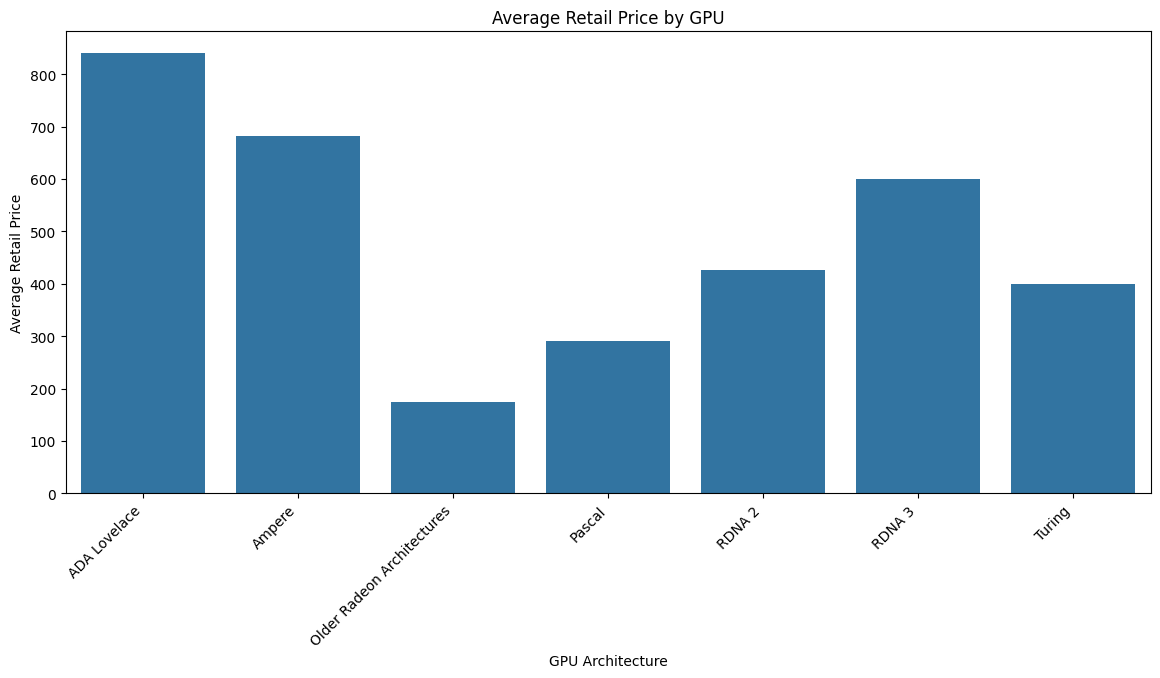

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=average_retail_prices.index, y=average_retail_prices.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('GPU Architecture')
plt.ylabel('Average Retail Price')
plt.title('Average Retail Price by GPU')
plt.savefig('plot2.svg', bbox_inches='tight')

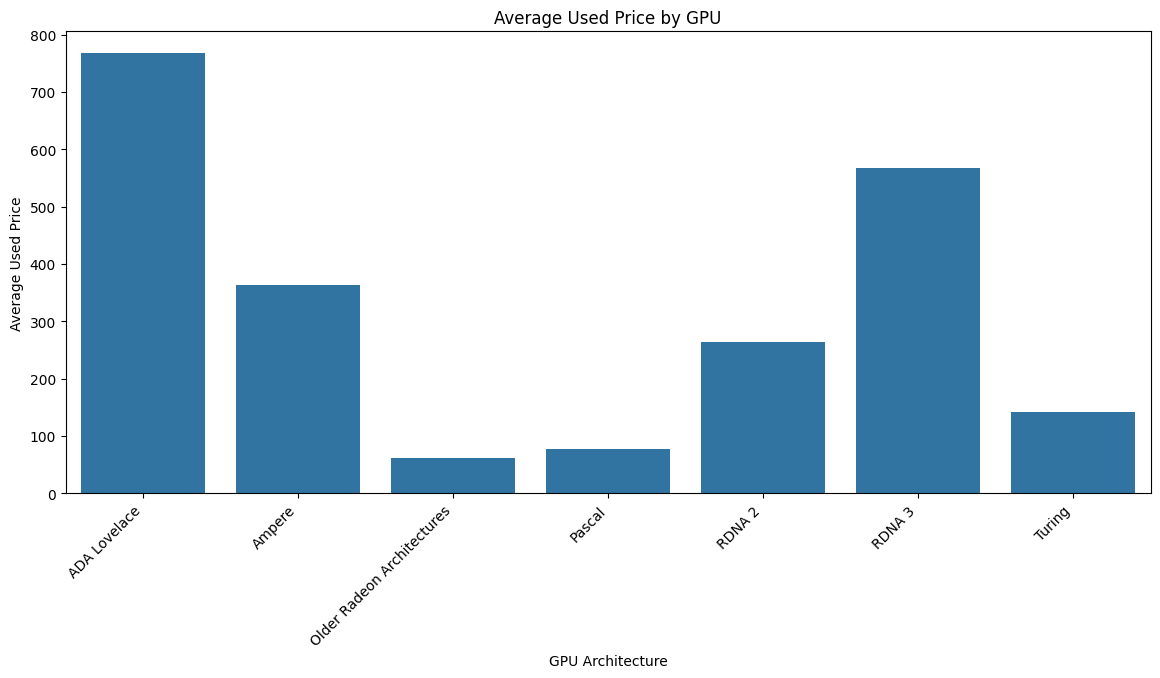

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=average_used_prices.index, y=average_used_prices.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('GPU Architecture')
plt.ylabel('Average Used Price')
plt.title('Average Used Price by GPU')
plt.savefig('plot3.svg', bbox_inches='tight')

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])
display(df2)

<ipython-input-27-e7ff6d38eb83>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Date'] = pd.to_datetime(df2['Date'])


,Date,Name,Retail Price,Used Price,GPU group
2,2023-01-03,GeForce GTX 1050,192,61,None
3,2024-01-03,GeForce GTX 1050,254,52,None
4,2023-01-04,GeForce GTX 1050,181,55,None
5,2024-01-04,GeForce GTX 1050,254,52,None
6,2023-01-05,GeForce GTX 1050,162,62,None
...,...,...,...,...,...
1082,2024-01-10,Radeon RX 7900 XTX,869,742,RDNA 3
1083,2023-01-11,Radeon RX 7900 XTX,946,939,RDNA 3
1084,2024-01-11,Radeon RX 7900 XTX,868,762,RDNA 3
1085,2023-01-12,Radeon RX 7900 XTX,961,936,RDNA 3


In [ ]:
df2['year'] = df2['Date'].dt.year
df2['day_of_year'] = df2['Date'].dt.strftime('%m-%d')
display(df2)

,Date,Name,Retail Price,Used Price,GPU group,year,day_of_year
2,2023-01-03,GeForce GTX 1050,192,61,None,2023,01-03
3,2024-01-03,GeForce GTX 1050,254,52,None,2024,01-03
4,2023-01-04,GeForce GTX 1050,181,55,None,2023,01-04
5,2024-01-04,GeForce GTX 1050,254,52,None,2024,01-04
6,2023-01-05,GeForce GTX 1050,162,62,None,2023,01-05
...,...,...,...,...,...,...,...
1082,2024-01-10,Radeon RX 7900 XTX,869,742,RDNA 3,2024,01-10
1083,2023-01-11,Radeon RX 7900 XTX,946,939,RDNA 3,2023,01-11
1084,2024-01-11,Radeon RX 7900 XTX,868,762,RDNA 3,2024,01-11
1085,2023-01-12,Radeon RX 7900 XTX,961,936,RDNA 3,2023,01-12


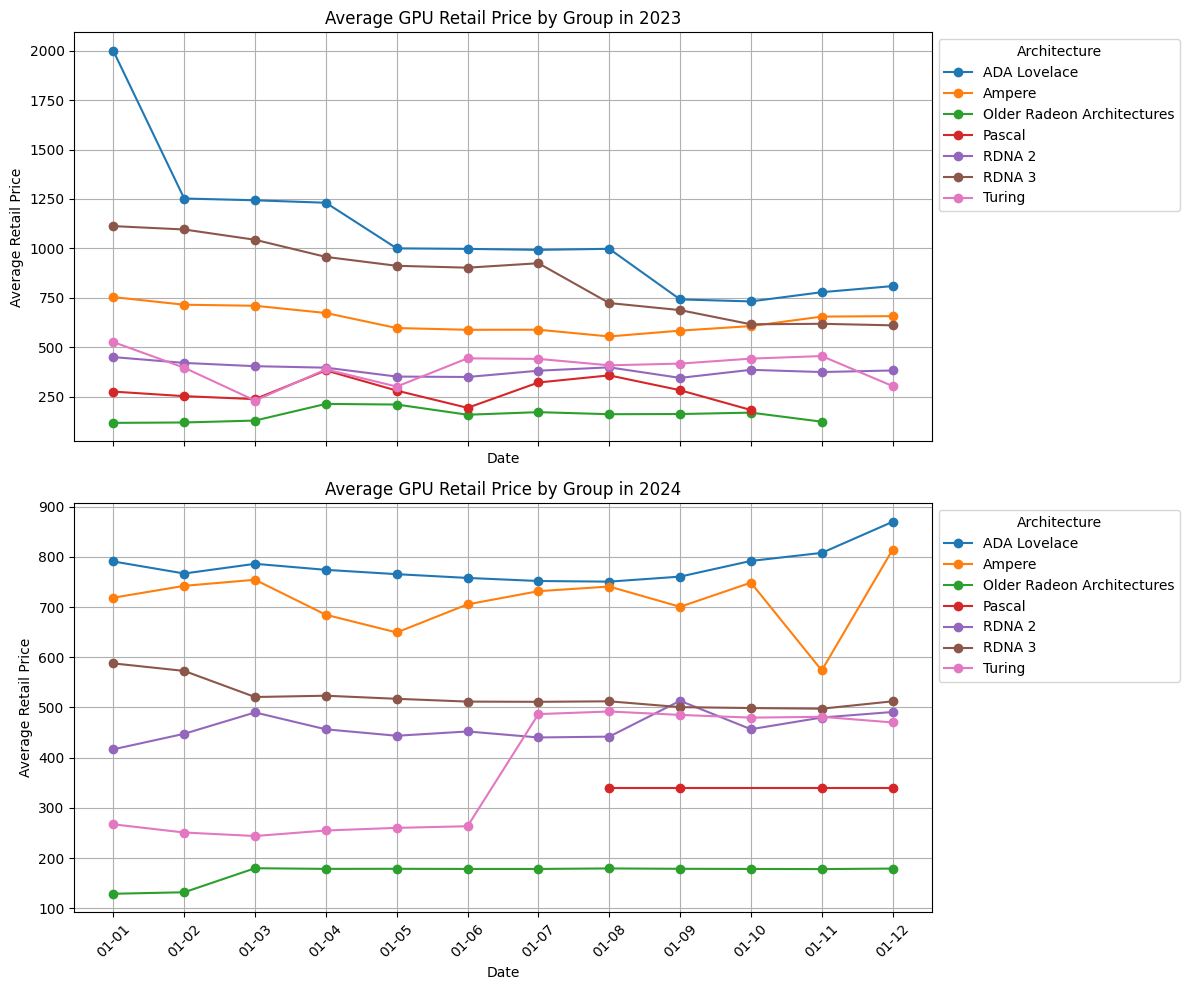

In [ ]:
df2['GPU group'] = df2['Name'].apply(get_gpu_group)

# Compute average price per GPU group per date
gpus = df2.groupby(['GPU group', 'day_of_year', 'year'])['Retail Price'].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot for 2023
for architecture in gpus['GPU group'].unique():
    subset_2023 = gpus[(gpus['GPU group'] == architecture) & (gpus['year'] == 2023)]
    if not subset_2023.empty:
        axes[0].plot(subset_2023['day_of_year'], subset_2023['Retail Price'], marker='o', linestyle='-',
                     label=architecture)

axes[0].set_title("Average GPU Retail Price by Group in 2023")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Average Retail Price")
axes[0].legend(title="Architecture", loc='upper left', bbox_to_anchor=(1,1))
axes[0].grid()

# Plot for 2024
for architecture in gpus['GPU group'].unique():
    subset_2024 = gpus[(gpus['GPU group'] == architecture) & (gpus['year'] == 2024)]
    if not subset_2024.empty:
        axes[1].plot(subset_2024['day_of_year'], subset_2024['Retail Price'], marker='o', linestyle='-',
                     label=architecture)

axes[1].set_title("Average GPU Retail Price by Group in 2024")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Average Retail Price")
axes[1].legend(title="Architecture", loc='upper left', bbox_to_anchor=(1,1))
axes[1].grid()

# Adjust layout and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plot4.png', bbox_inches='tight')

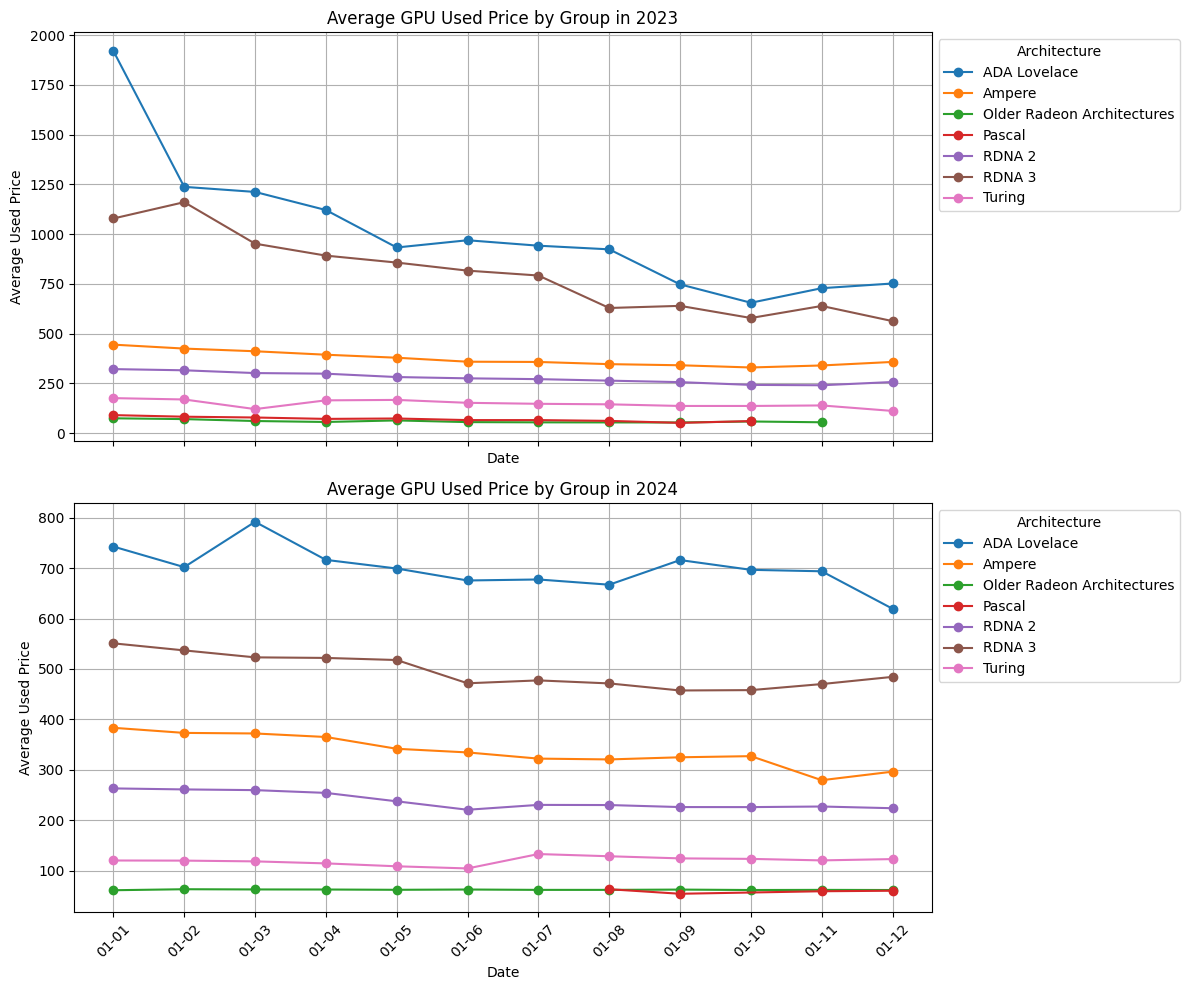

In [ ]:
df2['GPU group'] = df2['Name'].apply(get_gpu_group)

# Compute average price per GPU group per date
gpus = df2.groupby(['GPU group', 'day_of_year', 'year'])['Used Price'].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot for 2023
for architecture in gpus['GPU group'].unique():
    subset_2023 = gpus[(gpus['GPU group'] == architecture) & (gpus['year'] == 2023)]
    if not subset_2023.empty:
        axes[0].plot(subset_2023['day_of_year'], subset_2023['Used Price'], marker='o', linestyle='-',
                     label=architecture)

axes[0].set_title("Average GPU Used Price by Group in 2023")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Average Used Price")
axes[0].legend(title="Architecture", loc='upper left', bbox_to_anchor=(1,1))
axes[0].grid()

# Plot for 2024
for architecture in gpus['GPU group'].unique():
    subset_2024 = gpus[(gpus['GPU group'] == architecture) & (gpus['year'] == 2024)]
    if not subset_2024.empty:
        axes[1].plot(subset_2024['day_of_year'], subset_2024['Used Price'], marker='o', linestyle='-',
                     label=architecture)

axes[1].set_title("Average GPU Used Price by Group in 2024")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Average Used Price")
axes[1].legend(title="Architecture", loc='upper left', bbox_to_anchor=(1,1))
axes[1].grid()

# Adjust layout and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plot5.png', bbox_inches='tight')

Correlation between GPU Score and Time: 0.7074199110122221


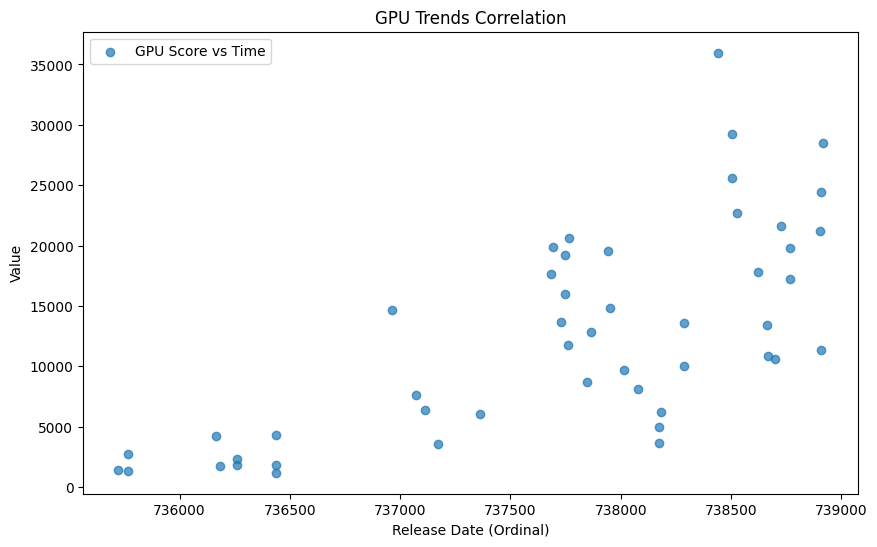

In [ ]:
# Convert 'Release Date' to ordinal representation for correlation calculation
df1['ReleaseDateOrdinal'] = df1['Release Date'].apply(lambda date: date.toordinal())

# Calculate the correlation between '3DMARK' and 'ReleaseDateOrdinal'
correlation_score_time = df1['3DMARK'].corr(df1['ReleaseDateOrdinal'])
print(f"Correlation between GPU Score and Time: {correlation_score_time}")


plt.figure(figsize=(10, 6))
plt.scatter(df1['ReleaseDateOrdinal'], df1['3DMARK'], label='GPU Score vs Time', alpha=0.7)

plt.xlabel('Release Date (Ordinal)')
plt.ylabel('Value')
plt.title('GPU Trends Correlation')
plt.legend()
plt.show()


Correlation between GPU Wattage and Time: 0.4945067234429817


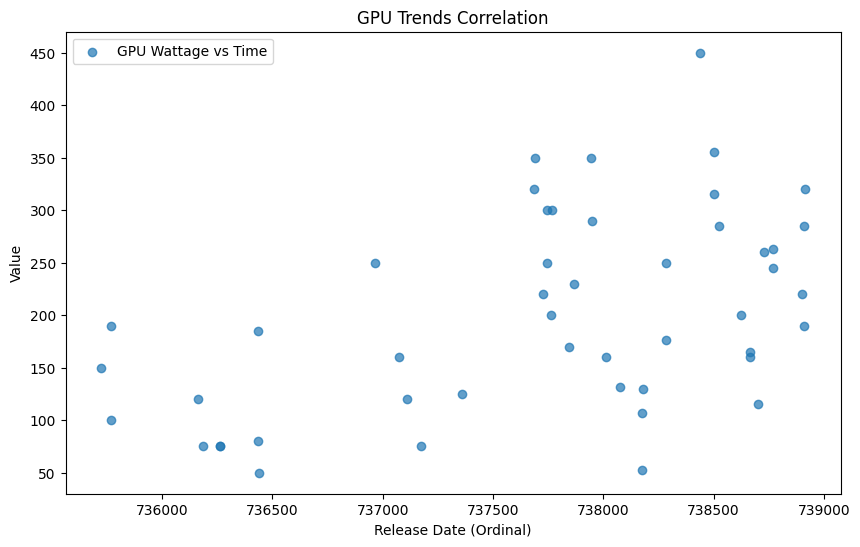

In [ ]:
# Convert 'Release Date' to ordinal representation for correlation calculation
df1['ReleaseDateOrdinal'] = df1['Release Date'].apply(lambda date: date.toordinal())

# Calculate the correlation between 'Wattage' and 'ReleaseDateOrdinal'
correlation_wattage_time = df1['Wattage'].corr(df1['ReleaseDateOrdinal'])
print(f"Correlation between GPU Wattage and Time: {correlation_wattage_time}")


plt.figure(figsize=(10, 6))
plt.scatter(df1['ReleaseDateOrdinal'], df1['Wattage'], label='GPU Wattage vs Time', alpha=0.7)

plt.xlabel('Release Date (Ordinal)')
plt.ylabel('Value')
plt.title('GPU Trends Correlation')
plt.legend()
plt.show()


In [ ]:
# Find the earliest release date
earliest_date = df1['Release Date'].min()

# Calculate the difference in days from the earliest date
df1['DaysSinceEarliestRelease'] = (df1['Release Date'] - earliest_date).dt.days

# Now you have an integer column 'DaysSinceEarliestRelease' representing the time difference
print(df1[['Release Date', 'DaysSinceEarliestRelease']].head())


  Release Date  DaysSinceEarliestRelease
0   2016-10-25                       539
1   2016-10-25                       539
2   2016-07-19                       441
3   2019-04-23                      1449
4   2019-10-29                      1638


In [ ]:
df = pd.merge(df1, df2, on='Name')

In [ ]:
df.head(50)

,Name,Wattage,VRAM,3DMARK,Release Date,group,Architecture,ReleaseDateOrdinal,DaysSinceEarliestRelease,Date,Retail Price,Used Price,GPU group,year,day_of_year
0,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2023-01-03,192,61,None,2023,01-03
1,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2024-01-03,254,52,None,2024,01-03
2,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2023-01-04,181,55,None,2023,01-04
3,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2024-01-04,254,52,None,2024,01-04
4,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2023-01-05,162,62,None,2023,01-05
5,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2024-01-05,254,52,None,2024,01-05
6,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2023-01-06,176,54,None,2023,01-06
7,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2024-01-06,254,52,None,2024,01-06
8,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2023-01-07,190,52,None,2023,01-07
9,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2024-01-07,254,52,None,2024,01-07


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['gpu_age_days'] = (df['Date'] - pd.to_datetime(df['Release Date'])).dt.days
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


In [ ]:
df

,Name,Wattage,VRAM,3DMARK,Release Date,group,Architecture,ReleaseDateOrdinal,DaysSinceEarliestRelease,Date,Retail Price,Used Price,GPU group,year,day_of_year,gpu_age_days,month,day
0,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2023-01-03,192,61,None,2023,01-03,2261,1,3
1,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2024-01-03,254,52,None,2024,01-03,2626,1,3
2,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2023-01-04,181,55,None,2023,01-04,2262,1,4
3,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2024-01-04,254,52,None,2024,01-04,2627,1,4
4,GeForce GTX 1050,75.0,2GB,1861,2016-10-25,NaN,Other,736262,539,2023-01-05,162,62,None,2023,01-05,2263,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Radeon RX 7900 XTX,355.0,24GB,29246,2022-12-13,RDNA 3,RDNA 3,738502,2779,2024-01-10,869,742,RDNA 3,2024,01-10,393,1,10
1001,Radeon RX 7900 XTX,355.0,24GB,29246,2022-12-13,RDNA 3,RDNA 3,738502,2779,2023-01-11,946,939,RDNA 3,2023,01-11,29,1,11
1002,Radeon RX 7900 XTX,355.0,24GB,29246,2022-12-13,RDNA 3,RDNA 3,738502,2779,2024-01-11,868,762,RDNA 3,2024,01-11,394,1,11
1003,Radeon RX 7900 XTX,355.0,24GB,29246,2022-12-13,RDNA 3,RDNA 3,738502,2779,2023-01-12,961,936,RDNA 3,2023,01-12,30,1,12


In [ ]:
# Remove 'GB' and convert to integer
df['VRAM'] = df['VRAM'].str.replace('GB', '', regex=False).astype(int)
df

,Name,Wattage,VRAM,3DMARK,Release Date,group,Architecture,ReleaseDateOrdinal,DaysSinceEarliestRelease,Date,Retail Price,Used Price,GPU group,year,day_of_year,gpu_age_days,month,day
0,GeForce GTX 1050,75.0,2,1861,2016-10-25,NaN,Other,736262,539,2023-01-03,192,61,None,2023,01-03,2261,1,3
1,GeForce GTX 1050,75.0,2,1861,2016-10-25,NaN,Other,736262,539,2024-01-03,254,52,None,2024,01-03,2626,1,3
2,GeForce GTX 1050,75.0,2,1861,2016-10-25,NaN,Other,736262,539,2023-01-04,181,55,None,2023,01-04,2262,1,4
3,GeForce GTX 1050,75.0,2,1861,2016-10-25,NaN,Other,736262,539,2024-01-04,254,52,None,2024,01-04,2627,1,4
4,GeForce GTX 1050,75.0,2,1861,2016-10-25,NaN,Other,736262,539,2023-01-05,162,62,None,2023,01-05,2263,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Radeon RX 7900 XTX,355.0,24,29246,2022-12-13,RDNA 3,RDNA 3,738502,2779,2024-01-10,869,742,RDNA 3,2024,01-10,393,1,10
1001,Radeon RX 7900 XTX,355.0,24,29246,2022-12-13,RDNA 3,RDNA 3,738502,2779,2023-01-11,946,939,RDNA 3,2023,01-11,29,1,11
1002,Radeon RX 7900 XTX,355.0,24,29246,2022-12-13,RDNA 3,RDNA 3,738502,2779,2024-01-11,868,762,RDNA 3,2024,01-11,394,1,11
1003,Radeon RX 7900 XTX,355.0,24,29246,2022-12-13,RDNA 3,RDNA 3,738502,2779,2023-01-12,961,936,RDNA 3,2023,01-12,30,1,12


In [ ]:
df_grouped = (
    df.groupby(['Architecture', 'Date'])[['Retail Price', 'Used Price']]
    .mean()
    .reset_index()
)

In [ ]:
df_grouped

,Architecture,Date,Retail Price,Used Price
0,ADA Lovelace,2022-01-12,2079.0,2119.0
1,ADA Lovelace,2023-01-01,1998.0,1921.0
2,ADA Lovelace,2023-01-02,1252.5,1238.0
3,ADA Lovelace,2023-01-03,1243.5,1212.5
4,ADA Lovelace,2023-01-04,1231.0,1121.5
...,...,...,...,...
181,Turing,2024-01-08,492.0,128.4
182,Turing,2024-01-09,485.2,124.2
183,Turing,2024-01-10,479.8,123.2
184,Turing,2024-01-11,481.4,120.2


In [ ]:
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'])
df_grouped = df_grouped[~(df_grouped['Date'].dt.year == 2022)]


In [ ]:
df_grouped

,Architecture,Date,Retail Price,Used Price
1,ADA Lovelace,2023-01-01,1998.000000,1921.000000
2,ADA Lovelace,2023-01-02,1252.500000,1238.000000
3,ADA Lovelace,2023-01-03,1243.500000,1212.500000
4,ADA Lovelace,2023-01-04,1231.000000,1121.500000
5,ADA Lovelace,2023-01-05,1000.666667,933.333333
...,...,...,...,...
181,Turing,2024-01-08,492.000000,128.400000
182,Turing,2024-01-09,485.200000,124.200000
183,Turing,2024-01-10,479.800000,123.200000
184,Turing,2024-01-11,481.400000,120.200000


In [ ]:
group_name = "RDNA 3"
df_rdna3 = df_grouped[df_grouped['Architecture'] == group_name].copy()
df_rdna3 = df_rdna3[['Date', 'Retail Price']].set_index('Date')

group_name = 'ADA Lovelace'
df_ada = df_grouped[df_grouped['Architecture'] == group_name].copy()
df_ada = df_ada[['Date', 'Retail Price']].set_index('Date')

group_name = 'Ampere'
df_ampere = df_grouped[df_grouped['Architecture'] == group_name].copy()
df_ampere = df_ampere[['Date', 'Retail Price']].set_index('Date')

group_name = 'Turing'
df_turing = df_grouped[df_grouped['Architecture'] == group_name].copy()
df_turing = df_turing[['Date', 'Retail Price']].set_index('Date')

group_name = 'Pascal'
df_pascal = df_grouped[df_grouped['Architecture'] == group_name].copy()
df_pascal = df_pascal[['Date', 'Retail Price']].set_index('Date')

group_name = 'Older Radeon Architectures'
df_older = df_grouped[df_grouped['Architecture'] == group_name].copy()
df_older = df_older[['Date', 'Retail Price']].set_index('Date')

group_name = 'RDNA 2'
df_rdna2 = df_grouped[df_grouped['Architecture'] == group_name].copy()
df_rdna2 = df_rdna2[['Date', 'Retail Price']].set_index('Date')




In [ ]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA


def arima_order(data, order=10, verbose=True):
    p = d = q = range(0, order)
    pdq = list(itertools.product(p, d, q))
    warnings.filterwarnings("ignore")

    aic_list = []

    for o in pdq:
        try:
            model_arima = ARIMA(data, order=o)
            model_arima_fit = model_arima.fit()
            fit_aic = model_arima_fit.aic
            if verbose:
                print(o, "AIC =", fit_aic)
            if not np.isnan(fit_aic):
                aic_list.append((o, fit_aic))
        except:
            continue

    # Sort by AIC
    aic_list_sorted = sorted(aic_list, key=lambda x: x[1])

    print("\nTop 10 lowest AIC orders:")
    for order, aic in aic_list_sorted[:10]:
        print(f"Order {order}: AIC = {aic}")

    # Return the order with lowest AIC
    return aic_list_sorted[0][0] if aic_list_sorted else (0, 0, 0)

In [ ]:
arima_order(df_rdna3, order=4)

(0, 0, 0) AIC = 328.69215775663486
(0, 0, 1) AIC = 308.24561399869344
(0, 0, 2) AIC = 293.4874442755122
(0, 0, 3) AIC = 286.49826390721523
(0, 1, 0) AIC = 249.67693983273196
(0, 1, 1) AIC = 250.81549161439108
(0, 1, 2) AIC = 250.9549291544549
(0, 1, 3) AIC = 252.8452179302226
(0, 2, 0) AIC = 248.82592289506175
(0, 2, 1) AIC = 237.4149151793812
(0, 2, 2) AIC = 238.78599955526158
(0, 2, 3) AIC = 240.1674011580605
(0, 3, 0) AIC = 262.4187148657588
(0, 3, 1) AIC = 243.71929594134994
(0, 3, 2) AIC = 233.41820565918235
(0, 3, 3) AIC = 234.94205310779003
(1, 0, 0) AIC = 267.66991229644145
(1, 0, 1) AIC = 268.7245580964743
(1, 0, 2) AIC = 268.63481435110674
(1, 0, 3) AIC = 270.7202892616406
(1, 1, 0) AIC = 250.3061847468811
(1, 1, 1) AIC = 248.82634151531315
(1, 1, 2) AIC = 250.25211224147313
(1, 1, 3) AIC = 251.50073418554877
(1, 2, 0) AIC = 242.68671128061303
(1, 2, 1) AIC = 238.91243742406704
(1, 2, 2) AIC = 242.79318500915775
(1, 2, 3) AIC = 242.60296764150408
(1, 3, 0) AIC = 248.523229920

(0, 3, 2)

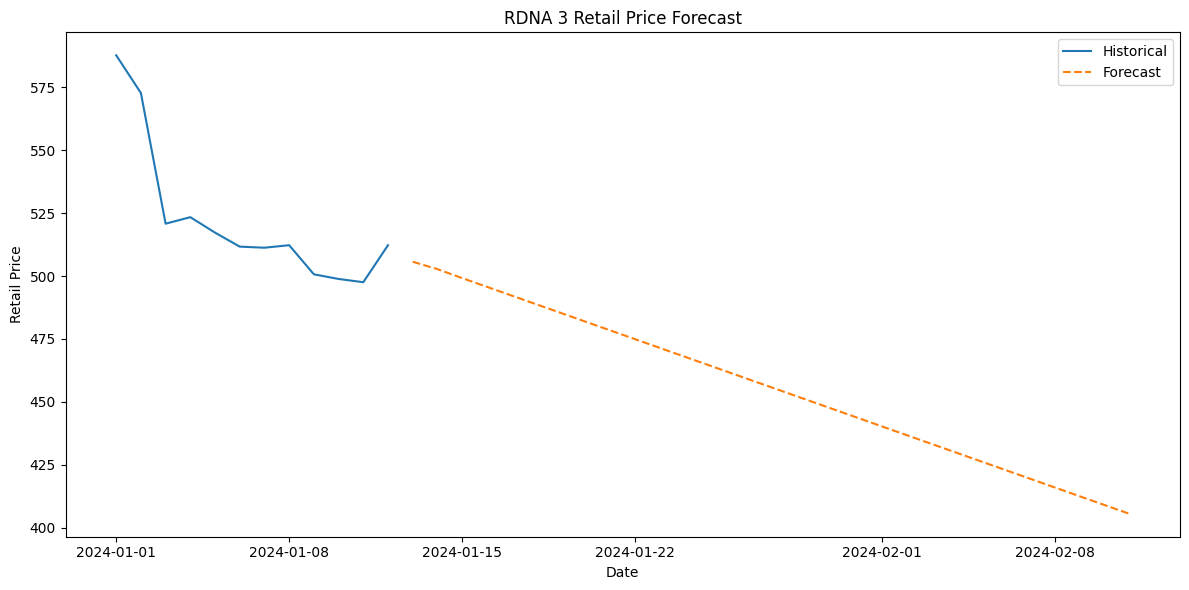

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fit the model
model = ARIMA(df_rdna3['Retail Price'], order=(1, 2, 1))
result = model.fit()

# 2. Forecast
n_periods = 30  # Forecast 30 days into the future
forecast = result.forecast(steps=n_periods)

# 3. Create future date index
future_dates = pd.date_range(start=df_rdna3.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# 4. Plot
historical_2024 = df_rdna3[df_rdna3.index >= '2024-01-01']

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(historical_2024.index, historical_2024['Retail Price'], label='Historical')

# Plot forecast
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')

plt.title('RDNA 3 Retail Price Forecast')
plt.xlabel('Date')
plt.ylabel('Retail Price')
plt.legend()
plt.tight_layout()
plt.savefig('RDNA3.png', bbox_inches='tight')


In [ ]:
arima_order(df_rdna2, order=5)

(0, 0, 0) AIC = 255.66542470644353
(0, 0, 1) AIC = 245.84521807540943
(0, 0, 2) AIC = 245.4567970491251
(0, 0, 3) AIC = 238.46434924716803
(0, 0, 4) AIC = 239.4828964078781
(0, 1, 0) AIC = 226.65179758589932
(0, 1, 1) AIC = 227.089396194888
(0, 1, 2) AIC = 229.08467316679713
(0, 1, 3) AIC = 230.92113940129872
(0, 1, 4) AIC = 229.57172177591391
(0, 2, 0) AIC = 237.5318523452668
(0, 2, 1) AIC = 222.90223007106763
(0, 2, 2) AIC = 223.52884684795984
(0, 2, 3) AIC = 225.51645161303696
(0, 2, 4) AIC = 227.42124397695403
(0, 3, 0) AIC = 252.04082004054163
(0, 3, 1) AIC = 232.83974222685166
(0, 3, 2) AIC = 221.0493477737312
(0, 3, 3) AIC = 222.15988236022193
(0, 3, 4) AIC = 224.132866045184
(0, 4, 0) AIC = 265.15161155800996
(0, 4, 1) AIC = 246.00190553028142
(0, 4, 2) AIC = 230.2974675746833
(0, 4, 3) AIC = 221.44407036058436
(0, 4, 4) AIC = 222.98234974905353
(1, 0, 0) AIC = 238.1605640849013
(1, 0, 1) AIC = 239.61590483830074
(1, 0, 2) AIC = 241.5084141344069
(1, 0, 3) AIC = 239.58692692293

(0, 3, 2)

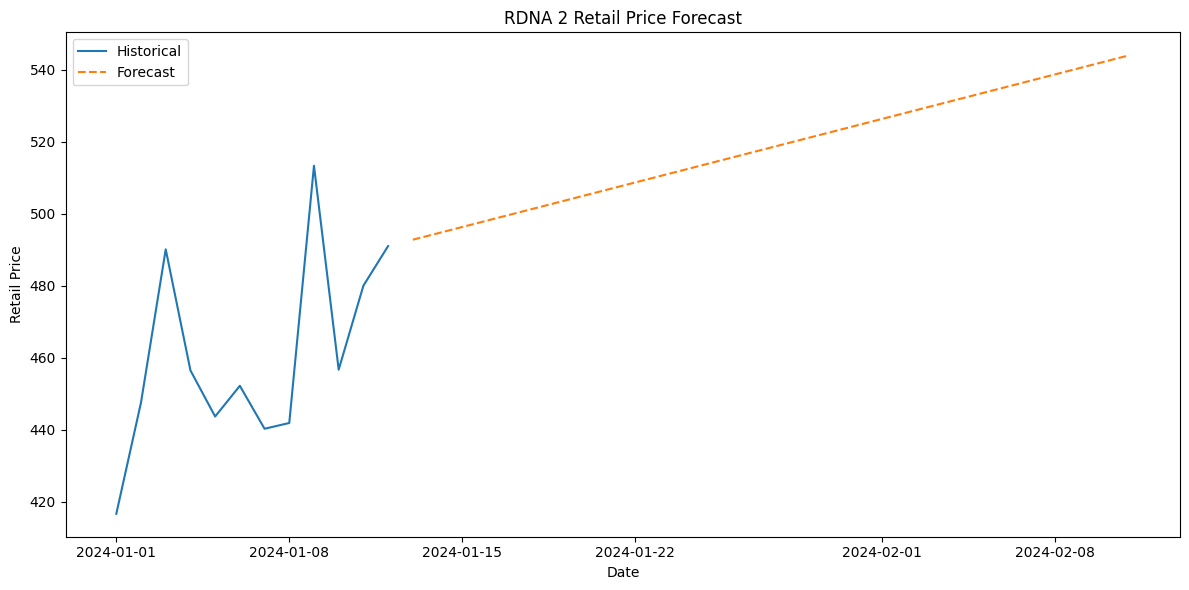

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fit the model
model = ARIMA(df_rdna2['Retail Price'], order=(0, 2, 1))
result = model.fit()

# 2. Forecast
n_periods = 30  # Forecast 30 days into the future
forecast = result.forecast(steps=n_periods)

# 3. Create future date index
future_dates = pd.date_range(start=df_rdna2.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# 4. Plot
historical_2024 = df_rdna2[df_rdna2.index >= '2024-01-01']

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(historical_2024.index, historical_2024['Retail Price'], label='Historical')

# Plot forecast
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')

# Plot confidence interval

plt.title('RDNA 2 Retail Price Forecast')
plt.xlabel('Date')
plt.ylabel('Retail Price')
plt.legend()
plt.tight_layout()
plt.savefig('RDNA2.png', bbox_inches='tight')


In [ ]:
arima_order(df_ada, order=3)


(0, 0, 0) AIC = 342.0376421219191
(0, 0, 1) AIC = 330.0514852408926
(0, 0, 2) AIC = 330.94330278523387
(0, 1, 0) AIC = 304.1908906984164
(0, 1, 1) AIC = 306.05974955743176
(0, 1, 2) AIC = 318.3617019438705
(0, 2, 0) AIC = 294.95871477171823
(0, 2, 1) AIC = 289.8442883975334
(0, 2, 2) AIC = 286.4865793553667
(1, 0, 0) AIC = 322.94922176645395
(1, 0, 1) AIC = 324.93041007492036
(1, 0, 2) AIC = 326.13864187268746
(1, 1, 0) AIC = 306.02264686051103
(1, 1, 1) AIC = 306.1637996935625
(1, 1, 2) AIC = 304.1576168278539
(1, 2, 0) AIC = 293.89330020209223
(1, 2, 1) AIC = 290.6058301040875
(1, 2, 2) AIC = 293.208042112649
(2, 0, 0) AIC = 324.9336292206265
(2, 0, 1) AIC = 324.38625345296106
(2, 0, 2) AIC = 326.80007594405674
(2, 1, 0) AIC = 308.0223163892805
(2, 1, 1) AIC = 306.89087468972804
(2, 1, 2) AIC = 310.0660311564395
(2, 2, 0) AIC = 288.17806416594385
(2, 2, 1) AIC = 289.15136882310435
(2, 2, 2) AIC = 303.8034708707651

Top 10 lowest AIC orders:
Order (0, 2, 2): AIC = 286.4865793553667
Or

(0, 2, 2)

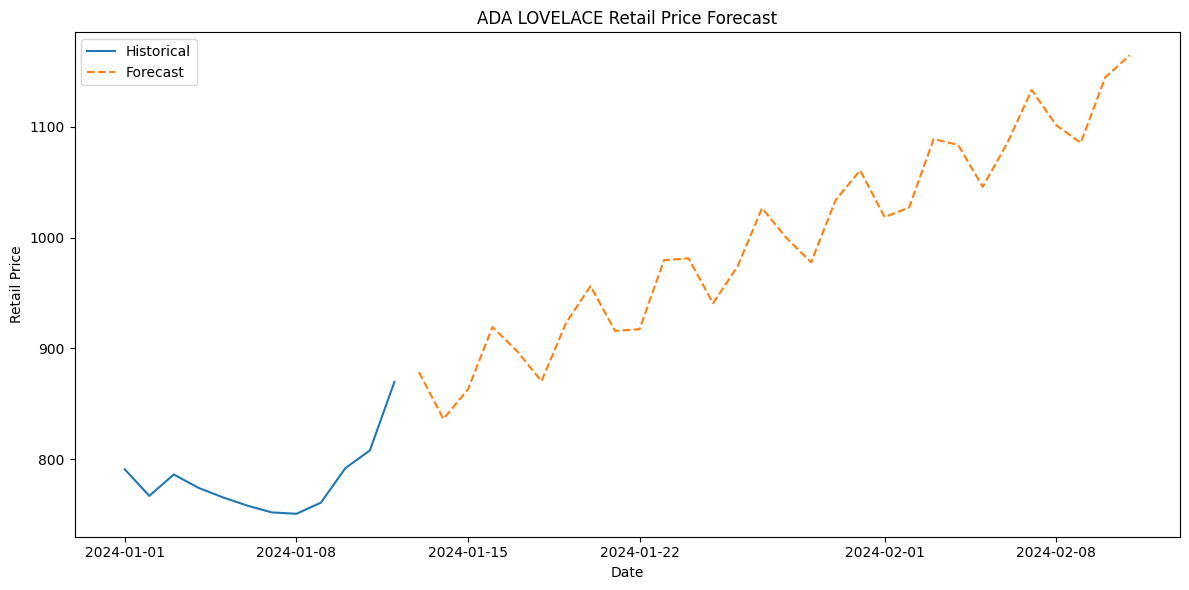

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fit the model
model = ARIMA(df_ada['Retail Price'], order=(2, 2, 2))
result = model.fit()

# 2. Forecast
n_periods = 30  # Forecast 30 days into the future
forecast = result.forecast(steps=n_periods)

# 3. Create future date index
future_dates = pd.date_range(start=df_ada.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# 4. Plot
historical_2024 = df_ada[df_ada.index >= '2024-01-01']

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(historical_2024.index, historical_2024['Retail Price'], label='Historical')

# Plot forecast
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')


plt.title('ADA LOVELACE Retail Price Forecast')
plt.xlabel('Date')
plt.ylabel('Retail Price')
plt.legend()
plt.tight_layout()
plt.savefig('ADA.png', bbox_inches='tight')


In [ ]:
arima_order(df_ampere, order=5)


(0, 0, 0) AIC = 275.44780942596145
(0, 0, 1) AIC = 275.08860145881476
(0, 0, 2) AIC = 270.093754561639
(0, 0, 3) AIC = 271.9531210744624
(0, 0, 4) AIC = 272.99035183639205
(0, 1, 0) AIC = 264.1799942151763
(0, 1, 1) AIC = 261.8312420803052
(0, 1, 2) AIC = 262.77822739237206
(0, 1, 3) AIC = 261.96679689853397
(0, 1, 4) AIC = 263.8008489397921
(0, 2, 0) AIC = 271.6255704031071
(0, 2, 1) AIC = 258.7945896941093
(0, 2, 2) AIC = 257.58929161768424
(0, 2, 3) AIC = 258.12290584968264
(0, 2, 4) AIC = 258.35519227249074
(0, 3, 0) AIC = 277.82352723285396
(0, 3, 1) AIC = 265.0663631605227
(0, 3, 2) AIC = 255.6403519254195
(0, 3, 3) AIC = 255.49074606881913
(0, 3, 4) AIC = 269.99461395053595
(0, 4, 0) AIC = 282.27727672271504
(0, 4, 1) AIC = 269.96172931950196
(0, 4, 2) AIC = 260.45411429684646
(0, 4, 3) AIC = 253.82536244082348
(0, 4, 4) AIC = 254.62012887422063
(1, 0, 0) AIC = 273.0201377038243
(1, 0, 1) AIC = 273.82098553132914
(1, 0, 2) AIC = 271.88234844103283
(1, 0, 3) AIC = 273.75790625136

(2, 4, 4)

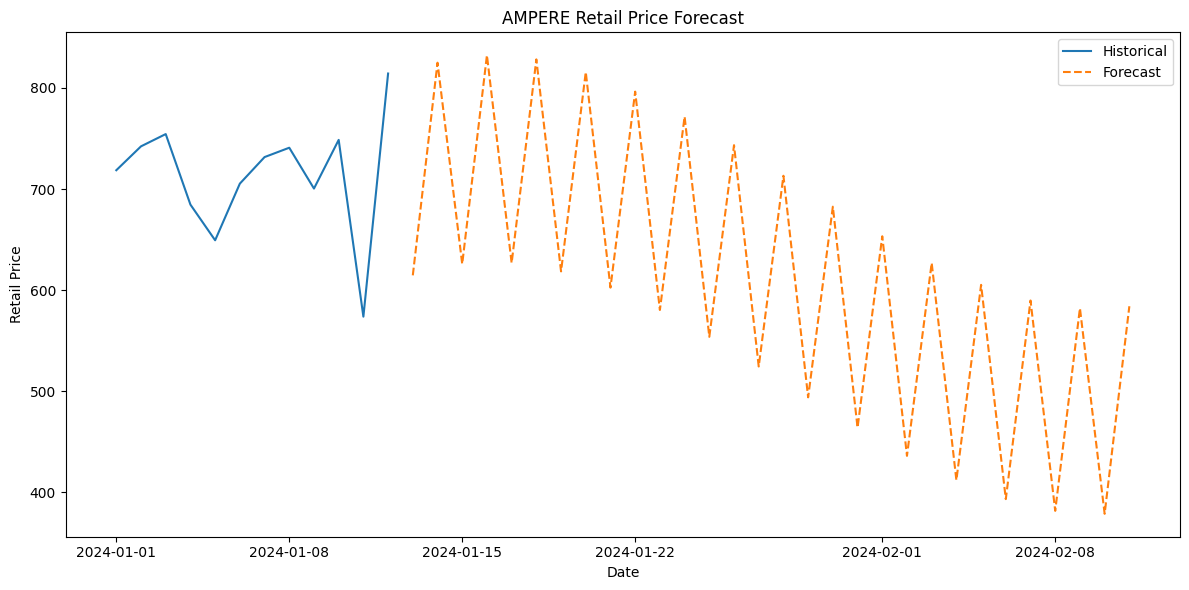

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fit the model
model = ARIMA(df_ampere['Retail Price'], order=(3, 4, 2))
result = model.fit()

# 2. Forecast
n_periods = 30  # Forecast 30 days into the future
forecast = result.forecast(steps=n_periods)

# 3. Create future date index
future_dates = pd.date_range(start=df_ampere.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# 4. Plot
historical_2024 = df_ampere[df_ampere.index >= '2024-01-01']

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(historical_2024.index, historical_2024['Retail Price'], label='Historical')

# Plot forecast
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')

# Plot confidence interval

plt.title('AMPERE Retail Price Forecast')
plt.xlabel('Date')
plt.ylabel('Retail Price')
plt.legend()
plt.tight_layout()
plt.savefig('AMPERE.png', bbox_inches='tight')


In [ ]:
arima_order(df_older, order=5)


(0, 0, 0) AIC = 219.66931134084015
(0, 0, 1) AIC = 214.04095797655418
(0, 0, 2) AIC = 215.69062866551403
(0, 0, 3) AIC = 217.45284472903845
(0, 0, 4) AIC = 216.93124892973952
(0, 1, 0) AIC = 207.3570570933881
(0, 1, 1) AIC = 209.30931457860956
(0, 1, 2) AIC = 208.05562455263458
(0, 1, 3) AIC = 209.6530993199343
(0, 1, 4) AIC = 215.03969141027136
(0, 2, 0) AIC = 214.2472073299935
(0, 2, 1) AIC = 203.8512995453498
(0, 2, 2) AIC = 205.85104099177582
(0, 2, 3) AIC = 206.07848744230995
(0, 2, 4) AIC = 207.56552753951084
(0, 3, 0) AIC = 225.59840948303278
(0, 3, 1) AIC = 210.15012464624843
(0, 3, 2) AIC = 203.82189399788015
(0, 3, 3) AIC = 205.6510960466082
(0, 3, 4) AIC = 207.78229507987925
(0, 4, 0) AIC = 236.8748891715252
(0, 4, 1) AIC = 220.2534519091834
(0, 4, 2) AIC = 208.39626019559324
(0, 4, 3) AIC = 205.89362468322477
(0, 4, 4) AIC = 207.61348014686516
(1, 0, 0) AIC = 215.1521014919788
(1, 0, 1) AIC = 215.677960120834
(1, 0, 2) AIC = 217.6510992165328
(1, 0, 3) AIC = 217.97272280344

(4, 3, 4)

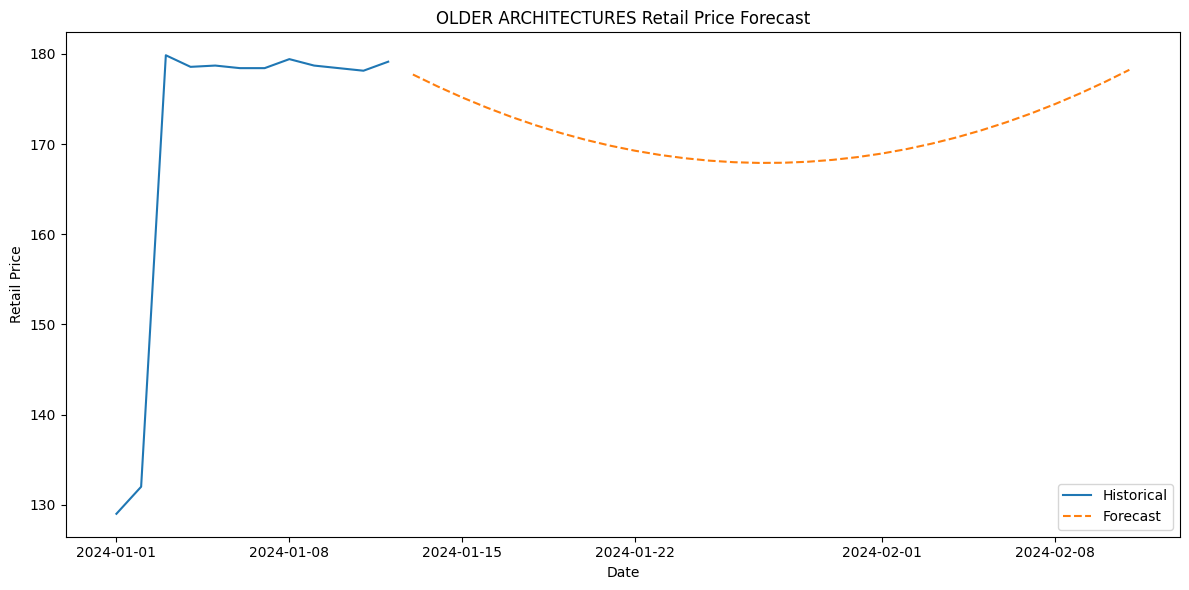

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fit the model
model = ARIMA(df_older['Retail Price'], order=(0, 3, 2))
result = model.fit()

# 2. Forecast
n_periods = 30  # Forecast 30 days into the future
forecast = result.forecast(steps=n_periods)

# 3. Create future date index
future_dates = pd.date_range(start=df_older.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# 4. Plot
historical_2024 = df_older[df_older.index >= '2024-01-01']

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(historical_2024.index, historical_2024['Retail Price'], label='Historical')

# Plot forecast
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')

# Plot confidence interval

plt.title('OLDER ARCHITECTURES Retail Price Forecast')
plt.xlabel('Date')
plt.ylabel('Retail Price')
plt.legend()
plt.tight_layout()
plt.savefig('OLD.png', bbox_inches='tight')


In [ ]:
arima_order(df_turing, order=4)


(0, 0, 0) AIC = 292.1916693938268
(0, 0, 1) AIC = 286.5899843591551
(0, 0, 2) AIC = 286.23114198907007
(0, 0, 3) AIC = 286.85915787005547
(0, 1, 0) AIC = 272.6743412119487
(0, 1, 1) AIC = 274.1833119426537
(0, 1, 2) AIC = 276.1790411112619
(0, 1, 3) AIC = 277.5044576463647
(0, 2, 0) AIC = 279.05893409225905
(0, 2, 1) AIC = 266.82524099562494
(0, 2, 2) AIC = 268.61529287736687
(0, 2, 3) AIC = 270.43839754913614
(0, 3, 0) AIC = 292.14172486115035
(0, 3, 1) AIC = 272.4758337861936
(0, 3, 2) AIC = 266.2207389836941
(0, 3, 3) AIC = 269.17976304440356
(1, 0, 0) AIC = 283.87199558747193
(1, 0, 1) AIC = 285.8534206197045
(1, 0, 2) AIC = 287.3487487888594
(1, 0, 3) AIC = 289.08829569156546
(1, 1, 0) AIC = 274.1715900532053
(1, 1, 1) AIC = 274.4658587081333
(1, 1, 2) AIC = 277.4666191059012
(1, 1, 3) AIC = 278.05009466047727
(1, 2, 0) AIC = 270.6978645165485
(1, 2, 1) AIC = 268.58362448447514
(1, 2, 2) AIC = 270.53396226313777
(1, 2, 3) AIC = 271.9945647040549
(1, 3, 0) AIC = 274.1221601896934
(

(1, 3, 1)

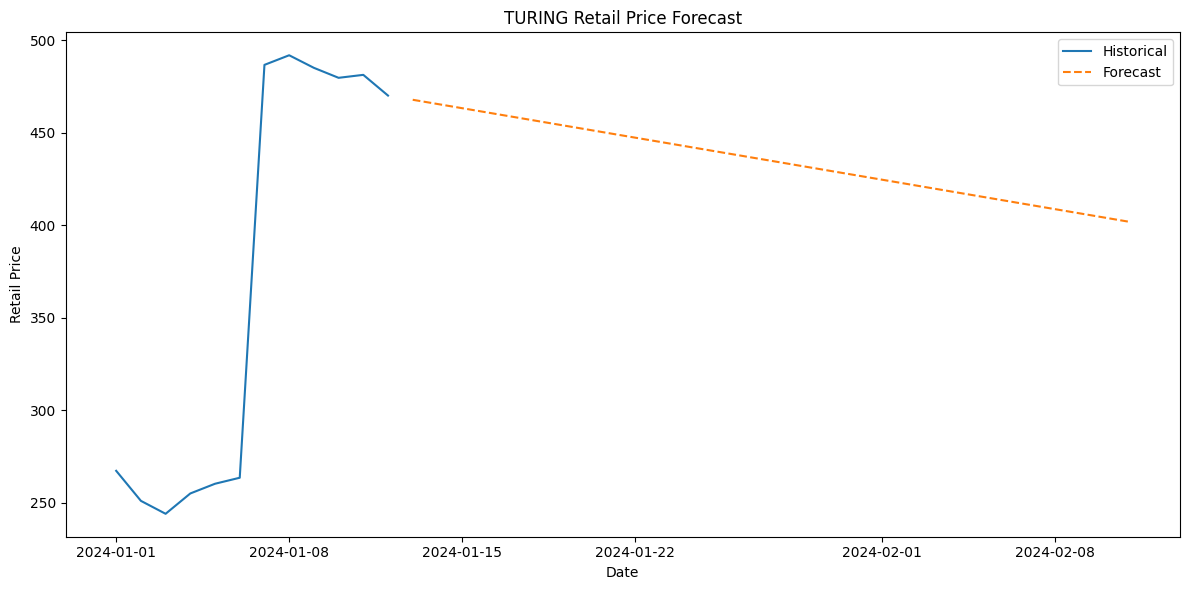

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fit the model
model = ARIMA(df_turing['Retail Price'], order=(0, 2, 1))
result = model.fit()

# 2. Forecast
n_periods = 30  # Forecast 30 days into the future
forecast = result.forecast(steps=n_periods)

# 3. Create future date index
future_dates = pd.date_range(start=df_turing.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# 4. Plot
historical_2024 = df_turing[df_turing.index >= '2024-01-01']

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(historical_2024.index, historical_2024['Retail Price'], label='Historical')

# Plot forecast
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')

# Plot confidence interval

plt.title('TURING Retail Price Forecast')
plt.xlabel('Date')
plt.ylabel('Retail Price')
plt.legend()
plt.tight_layout()
plt.savefig('TURING.png', bbox_inches='tight')
